<a href="https://colab.research.google.com/github/knirpsgraph/ada_portoSeguro/blob/main/notebooks/01_EDA_integrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import requests
import io
from zipfile import ZipFile
from pathlib import Path

import joblib

f"Pandas version: {pd.__version__}"

'Pandas version: 2.2.2'

In [ ]:
# mpl.style.available
mpl.style.use("seaborn-v0_8-colorblind")

# Porto Seguro´s Safe Driver Prediction
Download URL and Informationen über Daten: www.openml.org/search?type=data&status=active&id=42742   
Informationen über den Datensatz aus einer Kaggel Competition im Jahr 2017: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction


## Download

In [ ]:
# load dataset
from sklearn.datasets import fetch_openml
df, target = fetch_openml(
    "porto-seguro", version = 3, as_frame = True, return_X_y=True, parser = "auto"
)

# save dataset
joblib.dump((df, target), "porto_seguro_data.pkl")

['porto_seguro_data.pkl']

In [ ]:
# reload dataset without downlaoding it again
df, target = joblib.load("porto_seguro_data.pkl")

df = pd.concat(
    (df, target.to_frame(name="claims")),
    axis = "columns",
)

df.sample(10)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,claims
131738,0.0,1,8.0,1,0,1,0,0,0,0,...,1.0,3.0,7.0,0,1,1,0,1,0,0
97024,2.0,1,4.0,0,0,0,1,0,0,0,...,4.0,4.0,10.0,0,0,1,1,1,0,0
479413,0.0,1,3.0,1,0,1,0,0,0,0,...,1.0,3.0,10.0,1,1,1,1,0,0,0
464015,3.0,1,6.0,0,4,0,1,0,0,0,...,3.0,2.0,10.0,0,1,1,0,0,1,1
451516,5.0,1,11.0,1,0,0,1,0,0,0,...,1.0,3.0,5.0,0,1,0,0,0,0,0
49648,6.0,1,8.0,0,0,0,0,0,1,0,...,0.0,6.0,9.0,0,1,1,0,0,0,0
275058,5.0,1,7.0,1,0,0,0,1,0,0,...,2.0,7.0,7.0,0,1,1,0,0,0,0
567727,6.0,1,6.0,1,0,1,0,0,0,0,...,1.0,6.0,9.0,0,0,0,1,0,0,0
389786,2.0,1,2.0,1,0,0,1,0,0,0,...,0.0,1.0,13.0,1,1,0,0,0,0,0
287091,5.0,1,6.0,1,0,0,1,0,0,0,...,0.0,2.0,5.0,1,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   ps_ind_01       595212 non-null  float64 
 1   ps_ind_02_cat   594996 non-null  category
 2   ps_ind_03       595212 non-null  float64 
 3   ps_ind_04_cat   595129 non-null  category
 4   ps_ind_05_cat   589403 non-null  category
 5   ps_ind_06_bin   595212 non-null  category
 6   ps_ind_07_bin   595212 non-null  category
 7   ps_ind_08_bin   595212 non-null  category
 8   ps_ind_09_bin   595212 non-null  category
 9   ps_ind_10_bin   595212 non-null  category
 10  ps_ind_11_bin   595212 non-null  category
 11  ps_ind_12_bin   595212 non-null  category
 12  ps_ind_13_bin   595212 non-null  category
 13  ps_ind_14       595212 non-null  float64 
 14  ps_ind_15       595212 non-null  float64 
 15  ps_ind_16_bin   595212 non-null  category
 16  ps_ind_17_bin   595212 non-null  categ

## Explorative Data Analysis (EDA)
### Task
Predict whether a driver will initiate an auto insurance claim in the next year.

### Information about Data
- missing values are coded with -1
- 595212 cases
- 58 features

### Missing Values

In [ ]:
# missing values
missing_counts = df.isna().sum()
missing_rel = missing_counts / len(df)

missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_ratio": missing_rel
})
missing_table = missing_table[missing_table['missing_count'] > 0].sort_values(by='missing_count', ascending=False)

print("\nAnzahl und prozentualer Anteil der fehlenden Werte pro Spalte:")
print(missing_table)


Anzahl und prozentualer Anteil der fehlenden Werte pro Spalte:
               missing_count  missing_ratio
ps_car_03_cat         411231       0.690898
ps_car_05_cat         266551       0.447825
ps_reg_03             107772       0.181065
ps_car_14              42620       0.071605
ps_car_07_cat          11489       0.019302
ps_ind_05_cat           5809       0.009760
ps_car_09_cat            569       0.000956
ps_ind_02_cat            216       0.000363
ps_car_01_cat            107       0.000180
ps_ind_04_cat             83       0.000139
ps_car_02_cat              5       0.000008
ps_car_11                  5       0.000008
ps_car_12                  1       0.000002


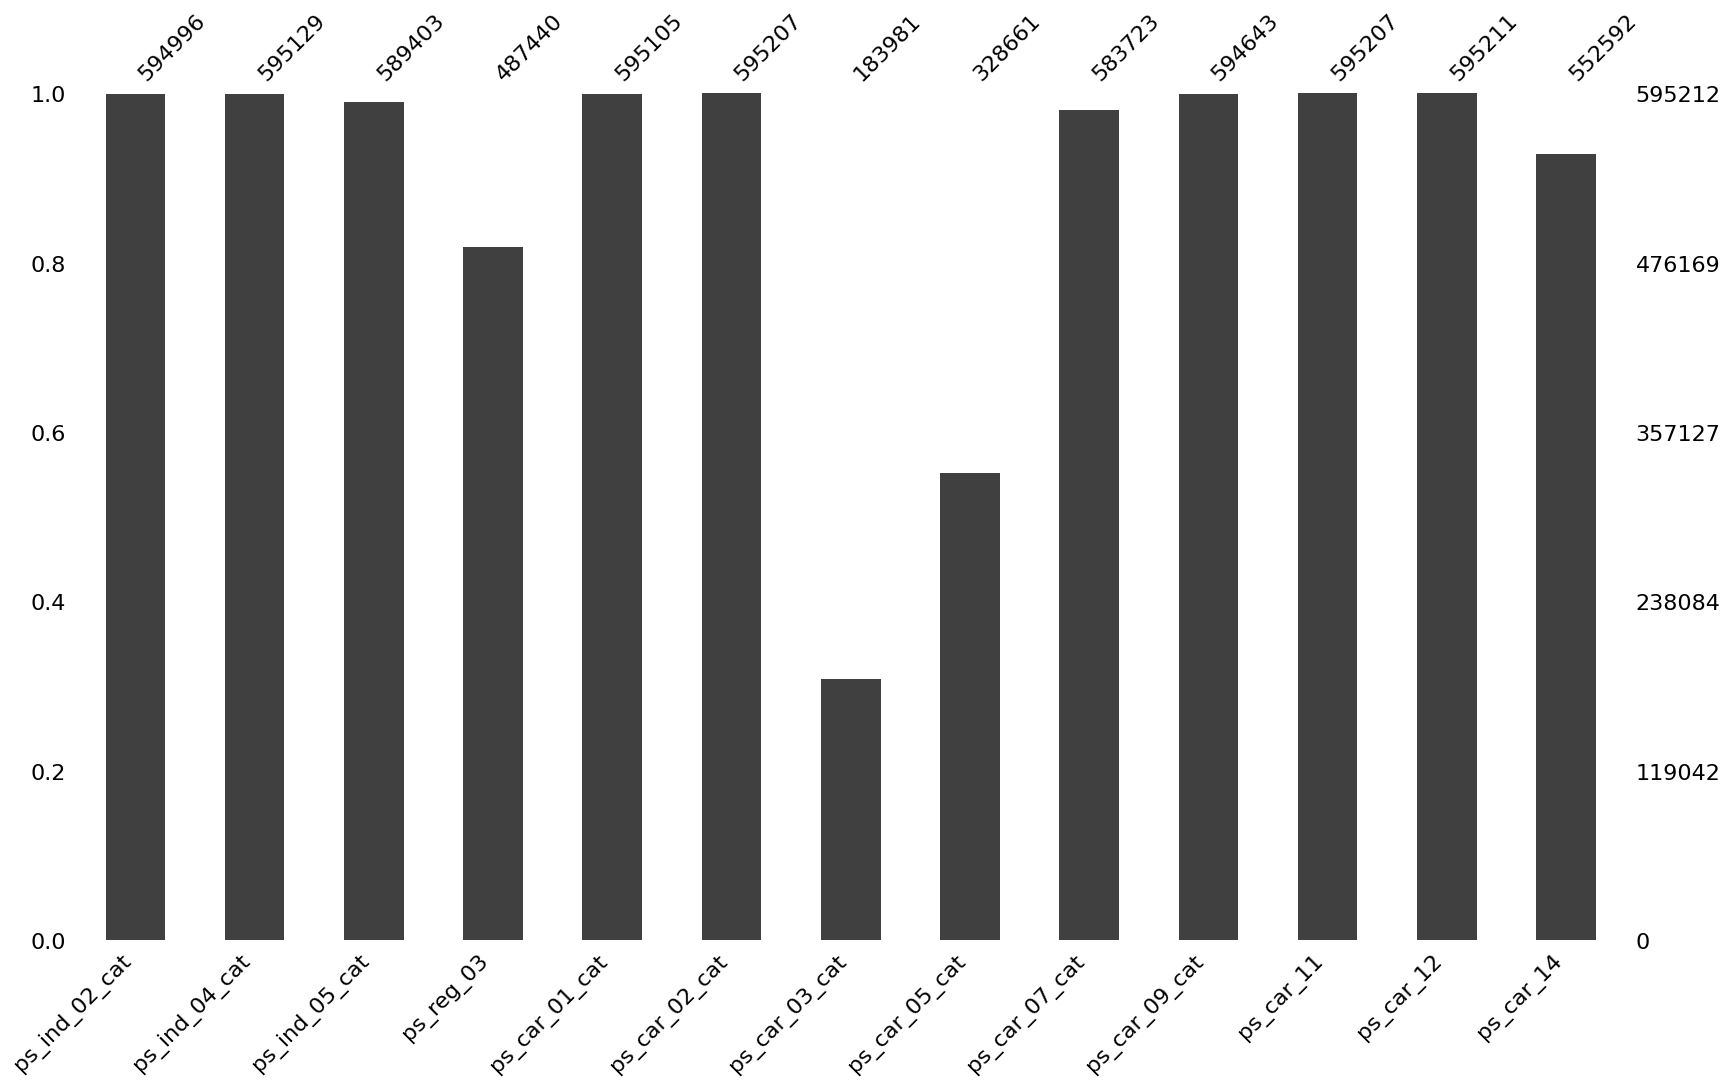

In [ ]:
# visualize how many data are missing
import missingno as msno
missing_value_columns = df.columns[df.isnull().any()].tolist()
df_missing = df[missing_value_columns]
msno.bar(df_missing,
         figsize=(20,11),
         labels=True,
         color=(0.25, 0.25, 0.25));

#### Observations
for ps_car_03_cat a critical number of values are missing (69%). Also ps_car_05_cat has almos 45% missing. These variables should be interpreted with caution.

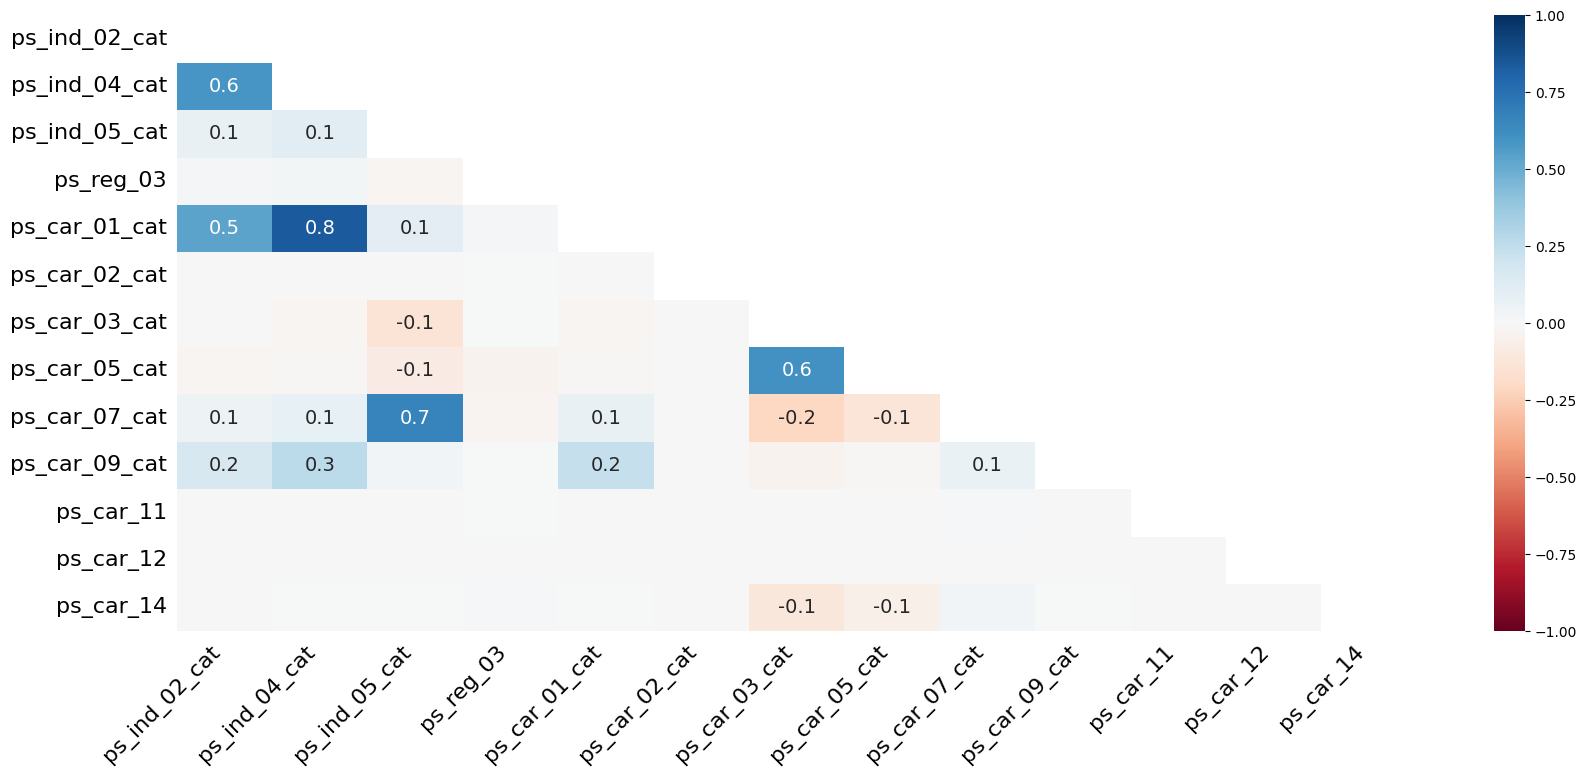

In [ ]:
# correlation of Missing Values
msno.heatmap(df_missing,figsize=(20,8));

#### Observations
ps_car_01_cat and ps_ind_04_cat show a very high correlation of missing values, meaning that if one value is missing in a case the other one will probably also be missing.   
High correlation (>= 0.5) are also seen in the following pairs:   
ps_car_09_cat & ps_ind_05_cat  
ps_ind_04_cat & ps_ind_02_cat  
ps_car_05_cat & ps_car_03_cat
ps_car_01_cat & ps_ind_02_cat



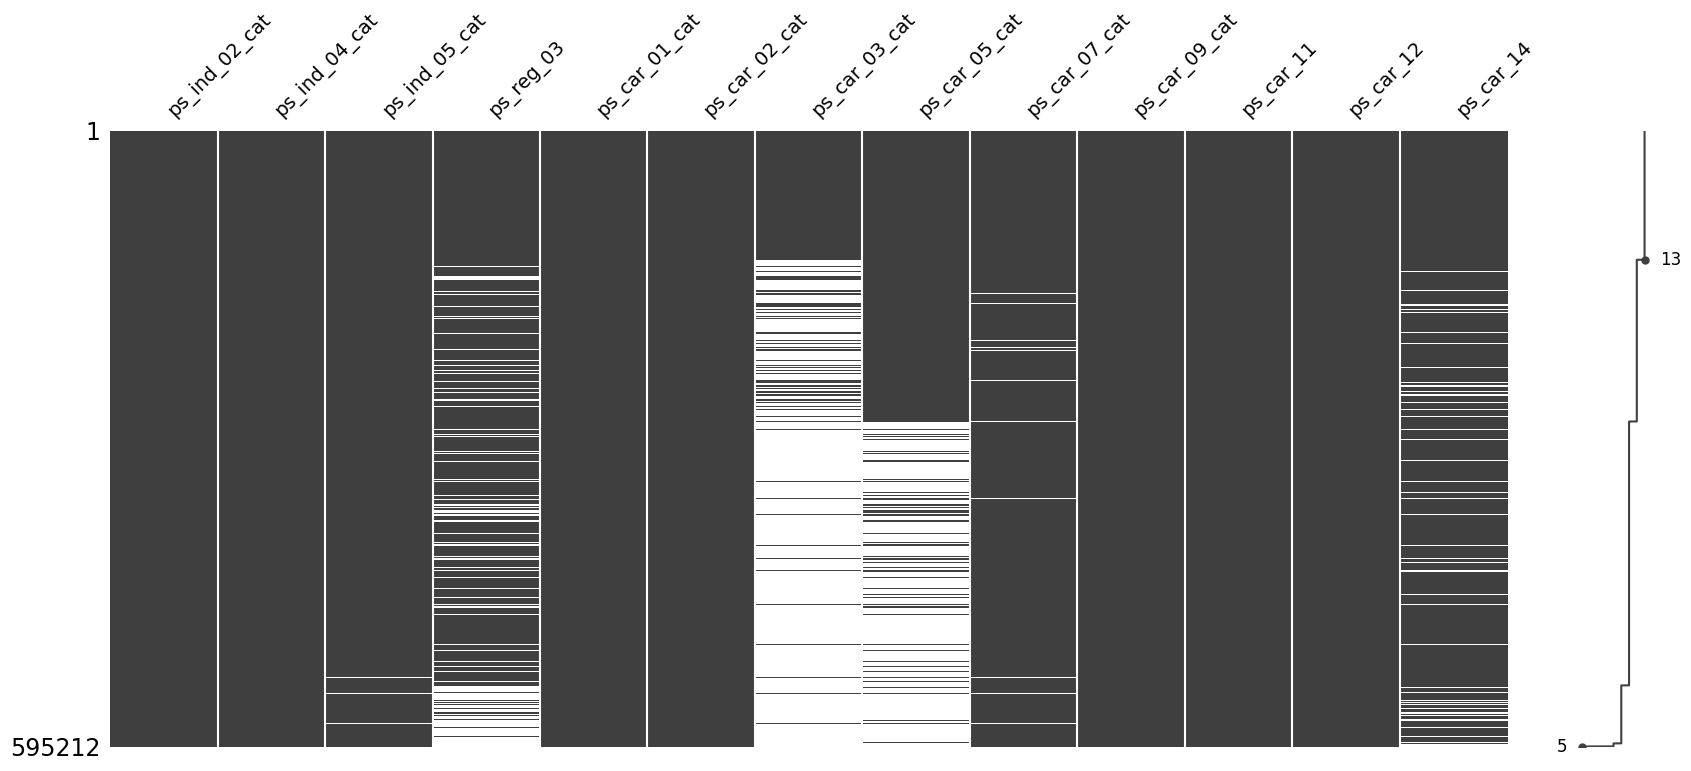

In [ ]:
# Verteilung der Spalten von fehlenden Werten
sorted_data = msno.nullity_sort(df_missing, sort='descending')
msno.matrix(sorted_data, figsize=(20,8), fontsize=14, color=(0.25, 0.25, 0.25));

#### observations
in all the dataset one case does not have more than 8 missing values in total.

### Numerical datatypes

In [ ]:
# define numeric variables
numeric_columns = df.select_dtypes(include="number").columns

df[numeric_columns].agg(["min","max","mean","median"])


,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,0.0000,0.100000,0.250619,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945,3.0000,1.264911,3.720626,...,6.000000,10.000000,9.000000,12.000000,7.000000,25.00000,19.000000,10.000000,13.000000,23.000000
mean,1.900378,4.423318,0.012451,7.299922,0.610991,0.439184,0.894047,2.3461,0.379947,0.813265,...,1.885886,7.689445,3.005823,9.225904,2.339034,8.43359,5.441382,1.441918,2.872288,7.539026
median,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.801561,3.0000,0.374166,0.765811,...,2.000000,8.000000,3.000000,9.000000,2.000000,8.00000,5.000000,1.000000,3.000000,7.000000


#### Observations
ps_ind_14: Median is 0 and mean is almost 0 too  
ps_car_11: median equlas the maximum  
-> these variables probably show littlte information  

For some variables the mean and the median are very close to the maximum or minimum (for example ps_ind_01; ps_reg_03; ps_car_15; ps_calc_05)

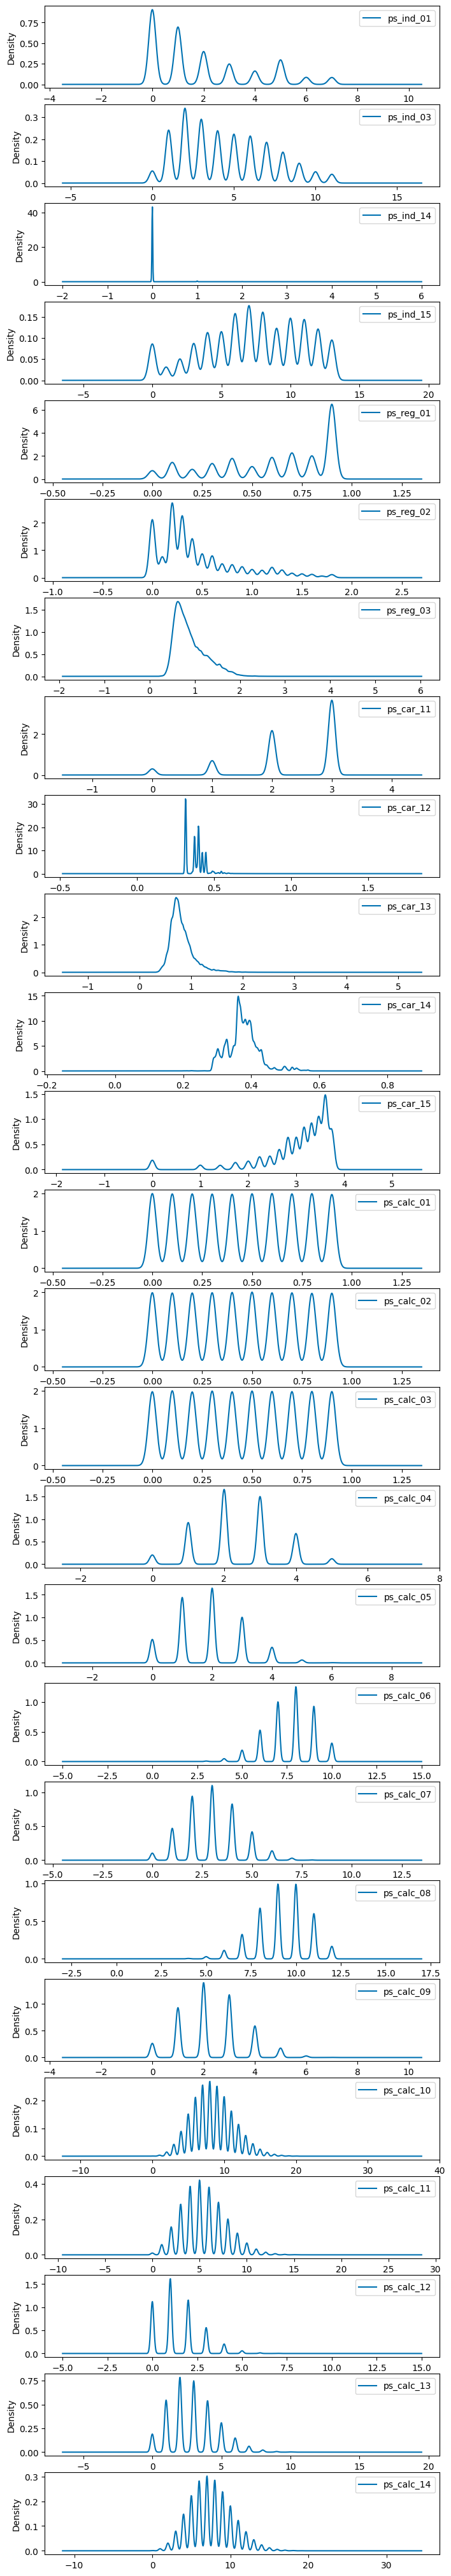

In [ ]:
# visualization
fig, axes = plt.subplots(26, 1, figsize = (8,52))

for ax, name in zip(axes, numeric_columns):
    df[name].plot.kde(ax=ax, legend=True)

#### observations
ps_ind_14: all data are seem to be 0  
ps_calc_01: data are distributed evenly  
ps_calc_02: data are distributed evenly  
ps_calc_03: data are distributed evenly  
-> seem to carry very little information
  

In [ ]:
# a closer look on those variables
df['ps_ind_14'].value_counts()

,count
ps_ind_14,
0.0,588832
1.0,5495
2.0,744
3.0,136
4.0,5


In [ ]:
# a closer look on those variables:
columns = ['ps_calc_01','ps_calc_02', 'ps_calc_03']

vc_table = pd.concat(
    [df[col].value_counts().rename(col) for col in columns],
    axis=1
)

vc_table.fillna(0).astype(int)

,ps_calc_01,ps_calc_02,ps_calc_03
0.6,59837,59501,59521
0.0,59780,59618,59318
0.8,59710,59118,59509
0.5,59612,60070,59832
0.7,59545,59502,59393
0.2,59513,59385,59137
0.1,59504,59383,60036
0.3,59377,59593,59819
0.4,59248,59823,59229
0.9,59086,59219,59418


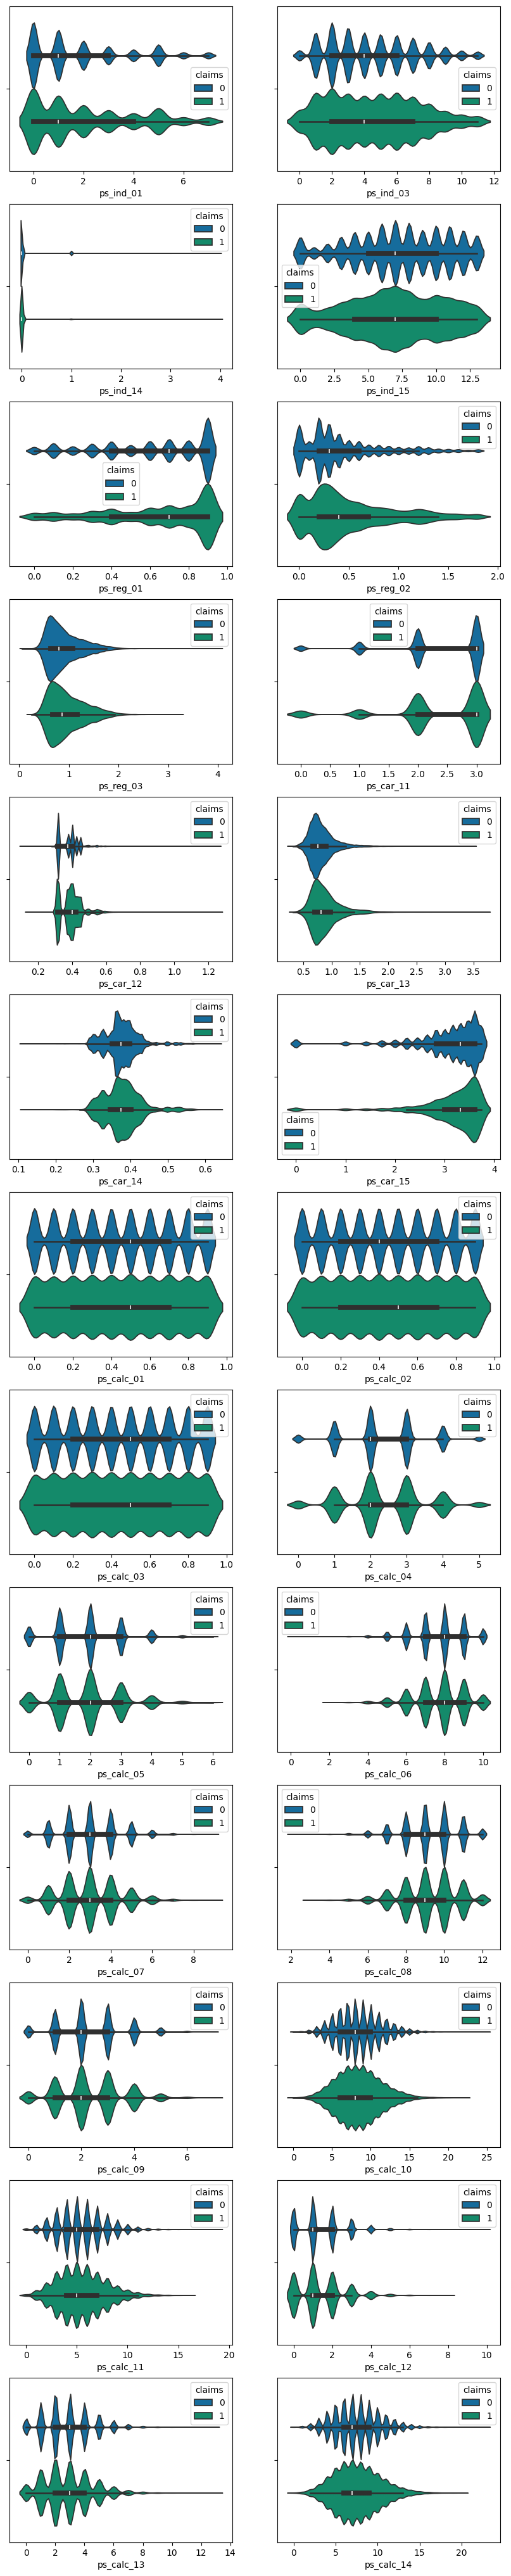

In [ ]:
# interaction with target variable
fig, axes = plt.subplots(13, 2, figsize=(10, 52))

for ax, name in zip(axes.ravel(), numeric_columns):
    sns.violinplot(df, x=name, hue="claims", ax=ax)


#### Observations
All variables don´t seem to differ very good between drivers who filed a claim and those who didn´t. Especially for the calc-variables the distributions show very little or no differences at all.

<Axes: >

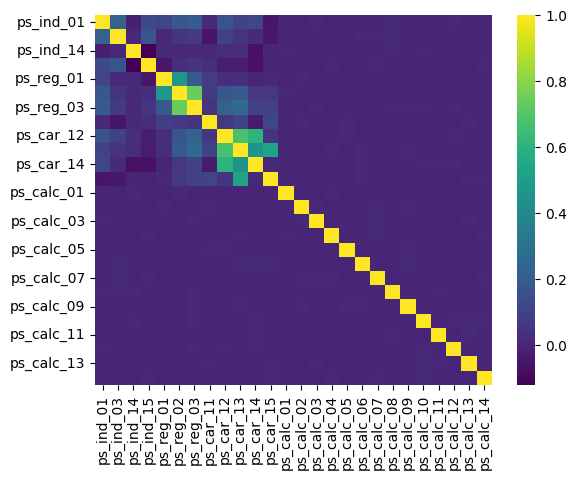

In [ ]:
# visualize the correlation
sns.heatmap(df.select_dtypes("number").corr(), cmap="viridis")

#### Observations
All variables with calc seem to have no interactions with the other numerical varaibles. This may be the reason they got excluded from the models in kaggle.

<Axes: >

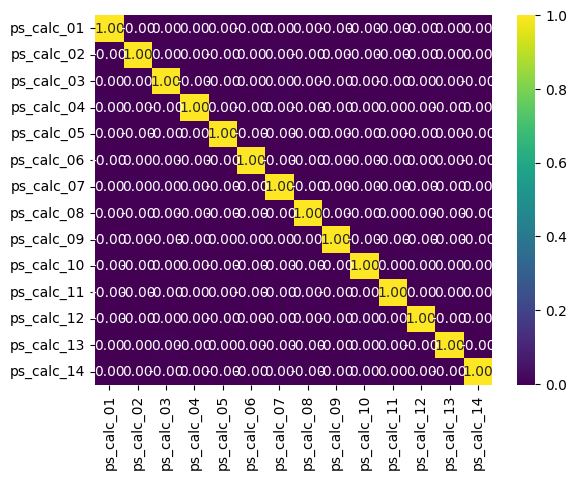

In [ ]:
filtered_df = df.select_dtypes("number").loc[:, df.select_dtypes("number").columns.str.contains("calc")]
sns.heatmap(filtered_df.corr(), cmap="viridis", annot=True,fmt=".2f")

the correlation matrix shows, that the correlation of all the calc variables are at least near 0.

<Axes: >

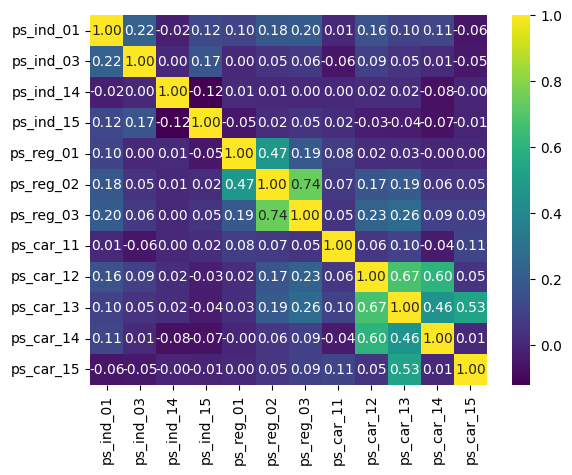

In [ ]:
# all variables without calc
filtered_df = df.select_dtypes("number").loc[:, ~df.select_dtypes("number").columns.str.contains("calc")]
sns.heatmap(filtered_df.corr(), cmap="viridis", annot=True,fmt=".2f")

#### observations
some of the variables show high correlations, while most of them have little interactions.   
ps_reg_02 & ps_reg_03 and ps_car_12 & ps_car_13 seem to have the highest correlations.

### Categorical variables

(
  df.select_dtypes("object")
  .drop(columns=["claims"])
  .apply(lambda s: s.value_counts().shape[0])
  .sort_values()
  .plot.barh(xlabel = "number of categories")
)

<Axes: xlabel='number of categories'>

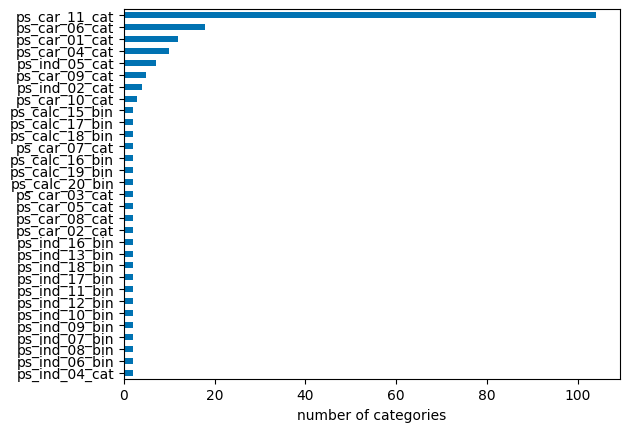

In [ ]:
# number of Categories
(
  df.select_dtypes("category")
  .drop(columns=["claims"])
  .apply(lambda s: s.value_counts().shape[0])
  .sort_values()
  .plot.barh(xlabel = "number of categories")
)

The first 8 variables have more than two variables all the other seem to be dichotom. The variable "ps_car_11-cat" has a lot more categories than the others.

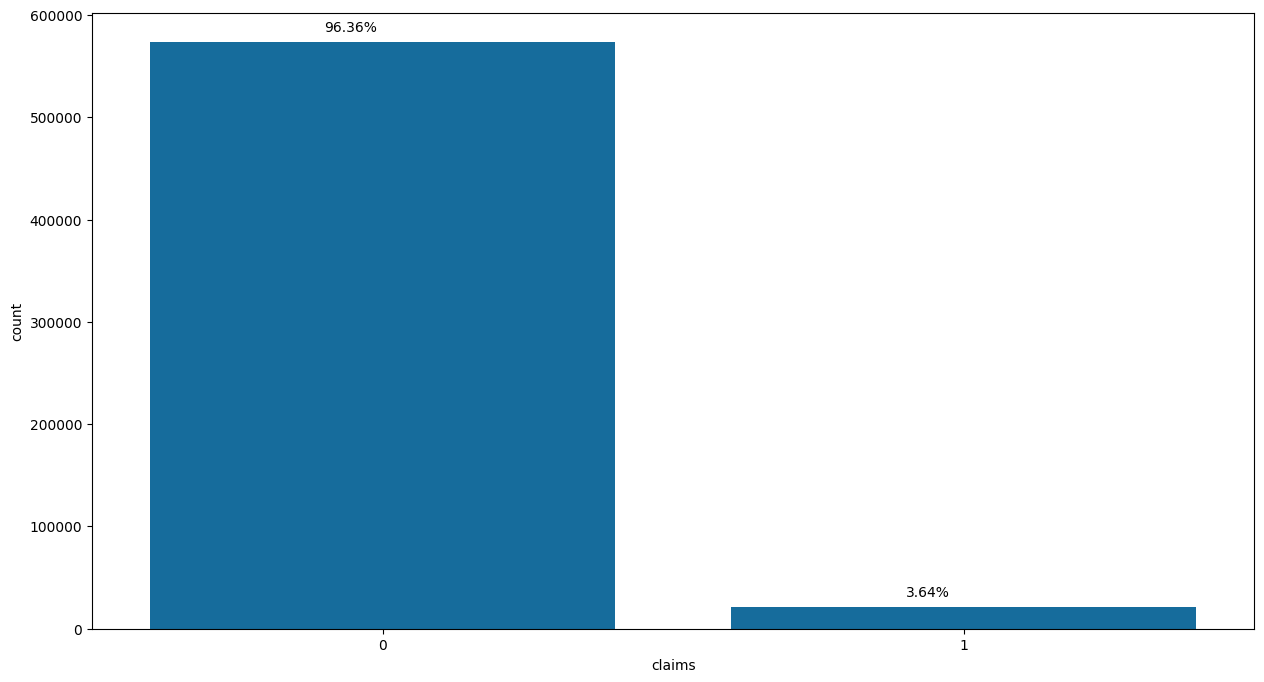

In [ ]:
# distribution of traget variable
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'claims', data=df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df['claims'])),
                (p.get_x() + 0.3, p.get_height() + 10000))

only 3.7 % of the drivers filed a claim, that makes it very difficult to predict the probability.

In [ ]:
# categories of the variable with many categories
df["ps_car_11_cat"].value_counts()

,count
ps_car_11_cat,
104,85083
103,24262
64,22278
87,17106
32,12578
...,...
58,1464
81,1433
56,1272


There are 104 categories for this variable but all seem to be filled with at least 1100 cases.

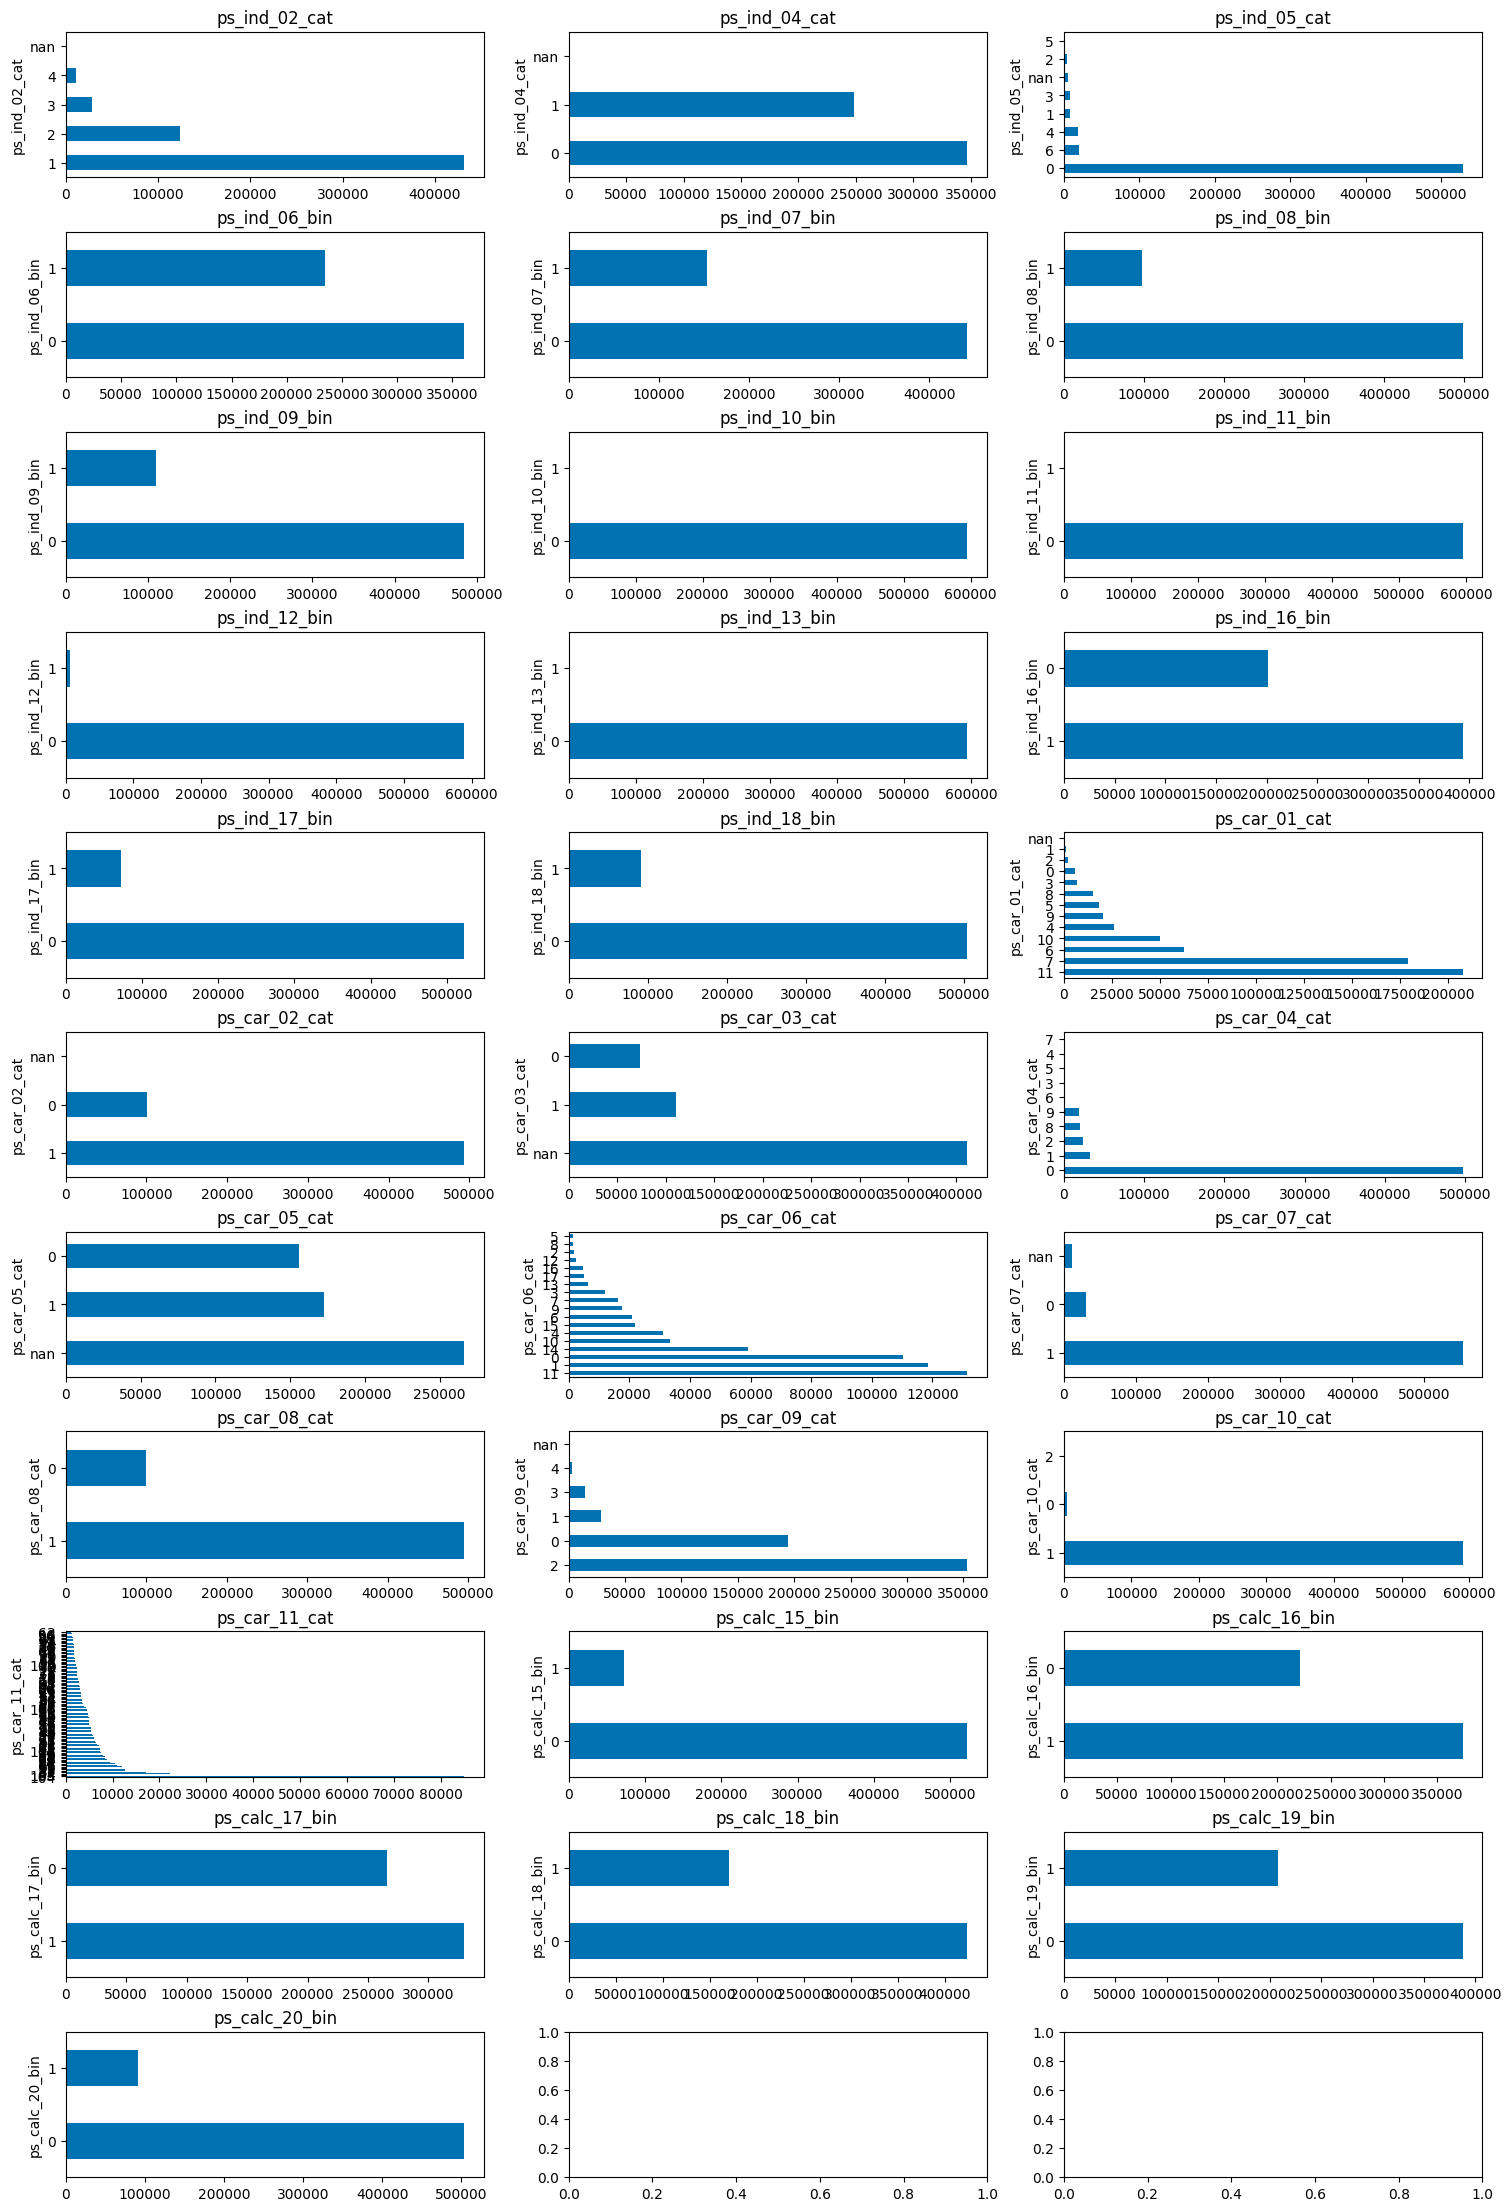

In [ ]:
# Values count of all categorical variables
categorical_columns = df.select_dtypes(include="category").drop(columns=["claims"]).columns

fig, axes = plt.subplots(11, 3, figsize=(15, 22), layout="constrained")

for ax, colname in zip(axes.flat, categorical_columns):
    (
        df[colname]
        .value_counts(dropna = False)
        .plot.barh(ax=ax, title=colname)
    )

#### Observations
In most of the dichotom variables one of the categories holds a large part of all the data.


In [ ]:
# proportions for all binary variables
binary_columns = [
    col for col in df.columns
    if df[col].nunique(dropna=True) == 2
]

rel_freq_table = pd.DataFrame({
    col: df[col].value_counts(normalize=True, dropna = False)
    for col in binary_columns
}).T

rel_freq_table

,0,1,NaN
ps_ind_04_cat,0.582927,0.416934,0.000139
ps_ind_06_bin,0.606258,0.393742,NaN
ps_ind_07_bin,0.742967,0.257033,NaN
ps_ind_08_bin,0.836079,0.163921,NaN
ps_ind_09_bin,0.814696,0.185304,NaN
ps_ind_10_bin,0.999627,0.000373,NaN
ps_ind_11_bin,0.998308,0.001692,NaN
ps_ind_12_bin,0.990561,0.009439,NaN
ps_ind_13_bin,0.999052,0.000948,NaN
ps_ind_16_bin,0.339177,0.660823,NaN


#### observations:
ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin have more than 99% of the cases in one category.

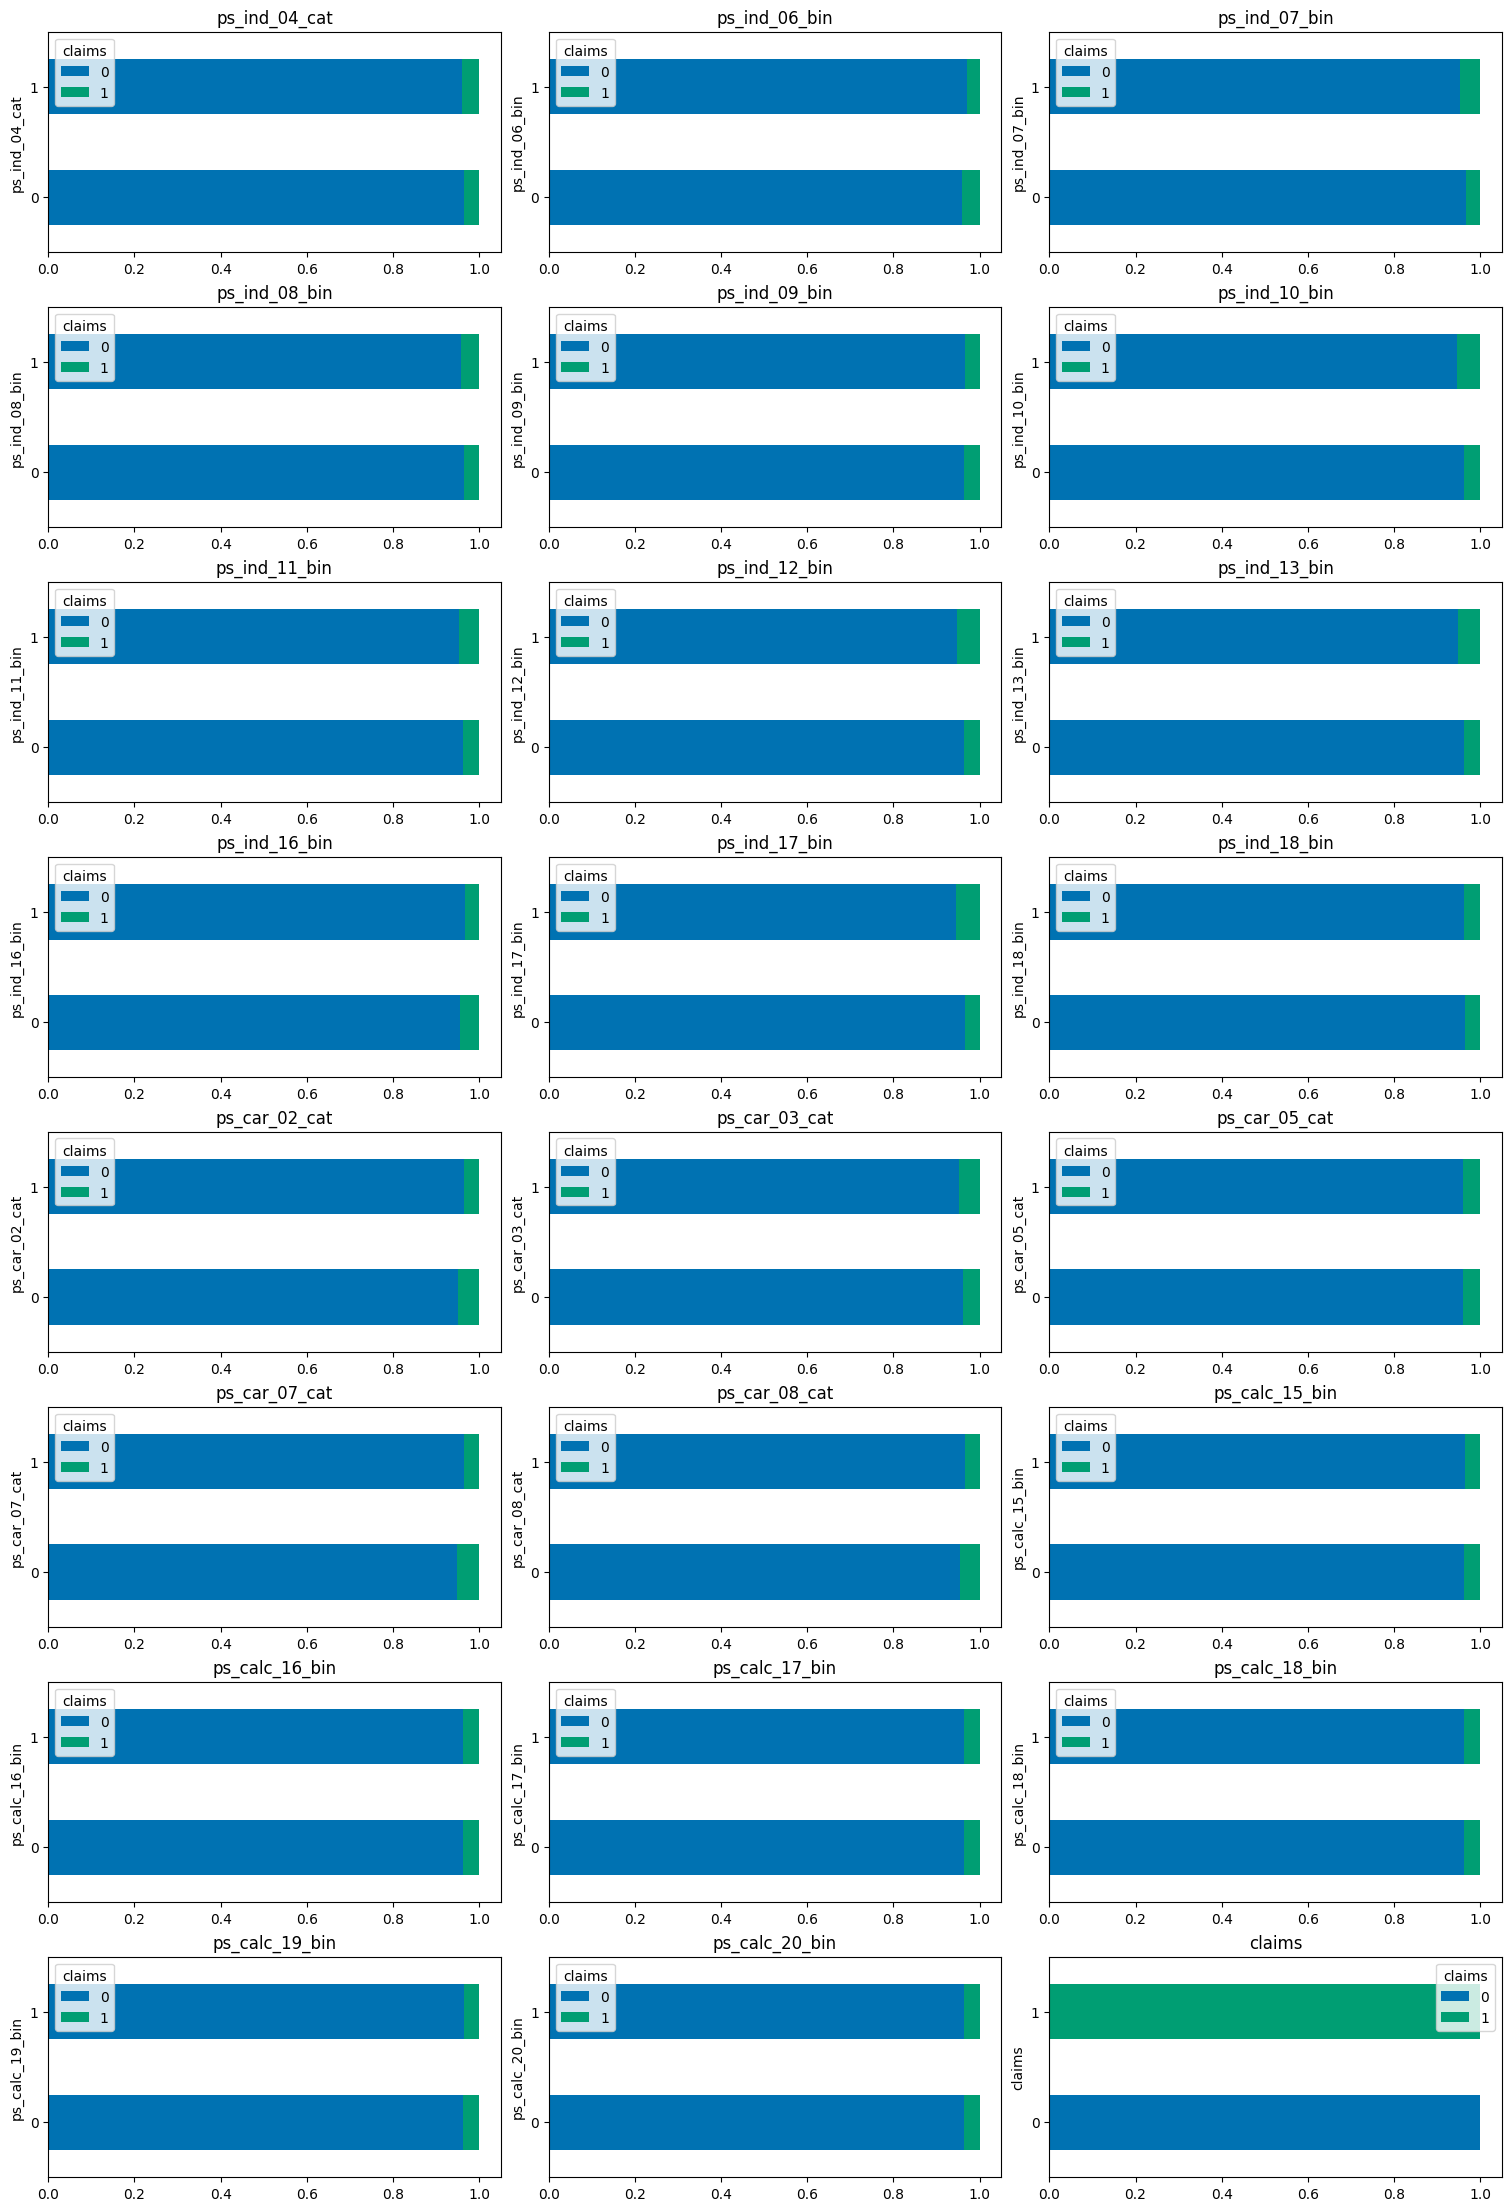

In [ ]:
# interaction of binary categories with target variable
fig, axes = plt.subplots(8, 3, figsize=(15, 22), layout="constrained")

for ax, colname in zip(axes.flat, binary_columns):
    (
        pd.crosstab(
            index=df[colname],
            columns=df["claims"]
        )
        .pipe(lambda df_: df_.div(df_.sum(axis = "columns"), axis = "rows"))
        .plot.barh(stacked=True, title=colname, ax=ax)
    )

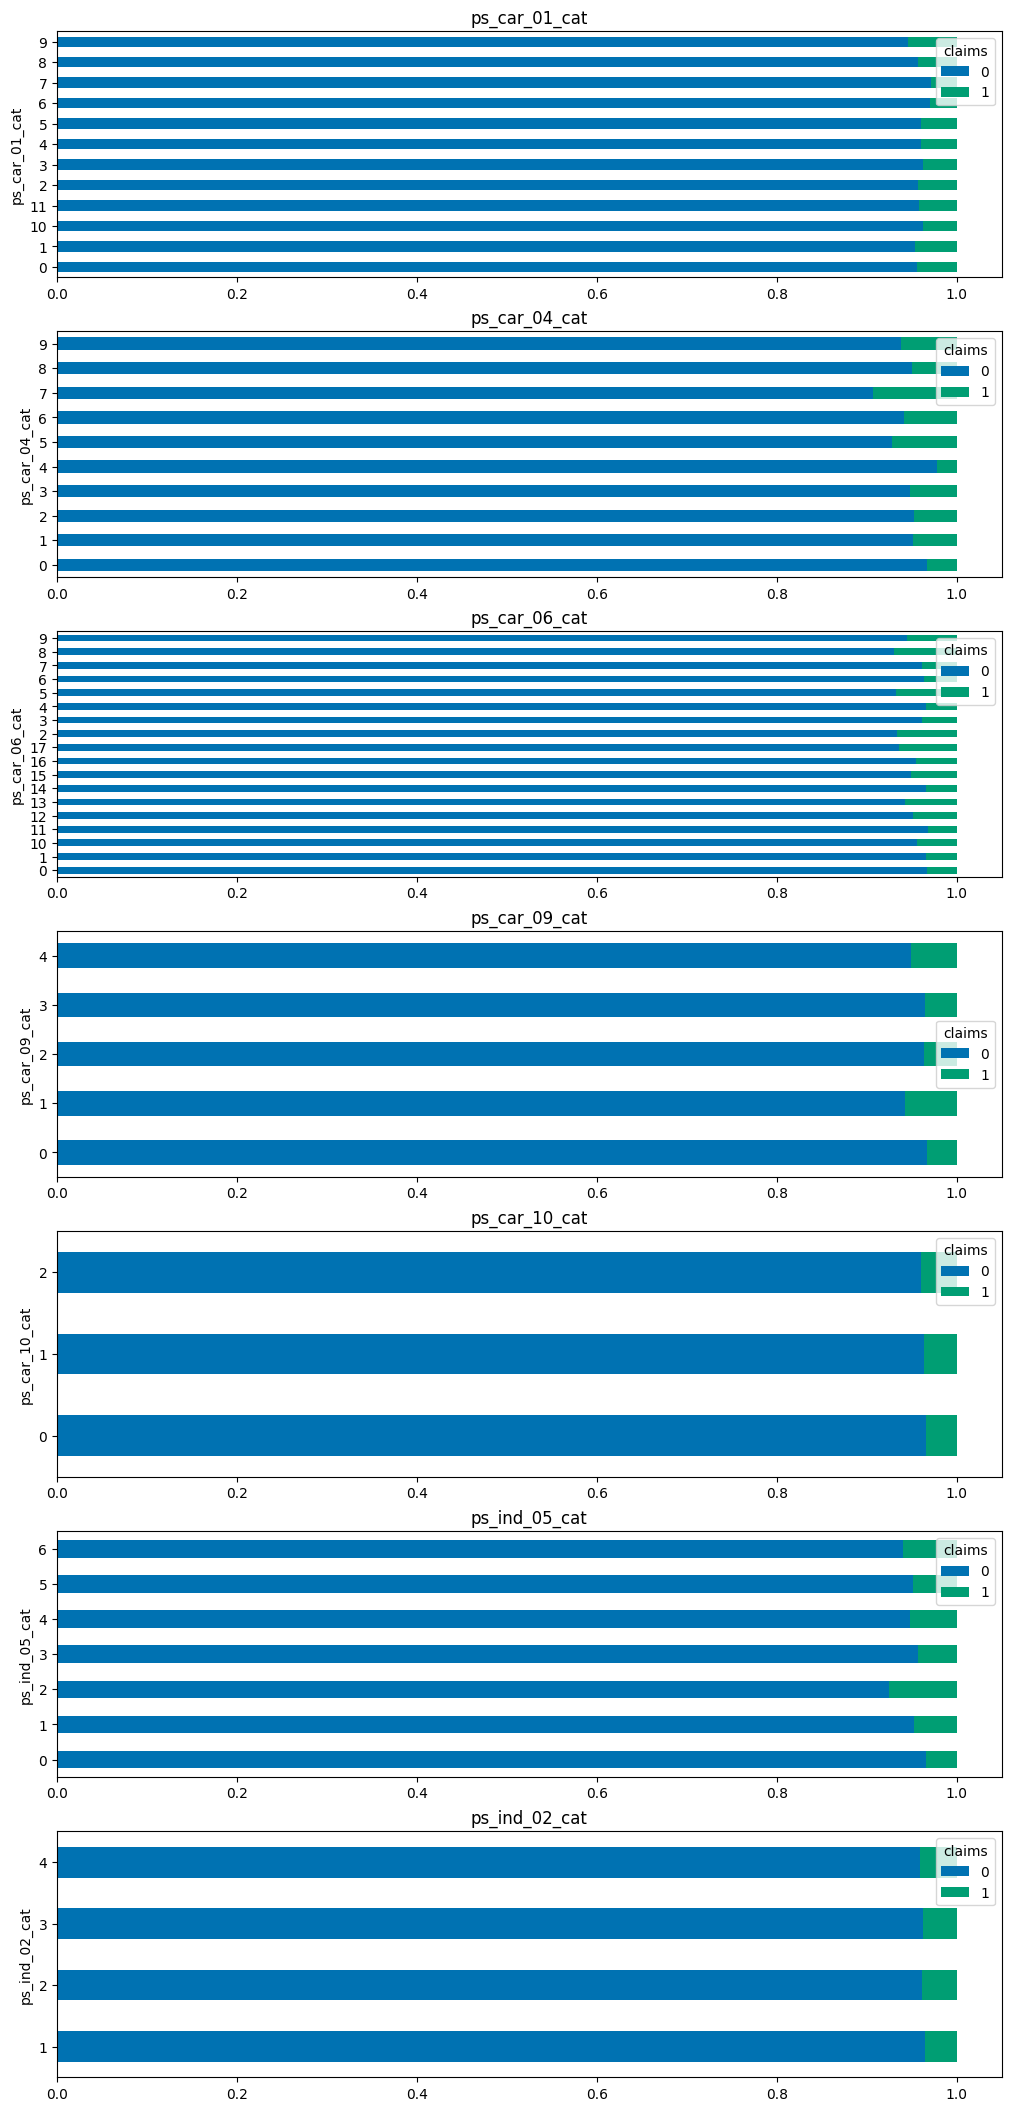

In [ ]:
# interactions wit ordinal variables and target
ordinal_columns = ["ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat",
                             "ps_car_09_cat", "ps_car_10_cat",
                             "ps_ind_05_cat", "ps_ind_02_cat"]
fig, axes = plt.subplots(7,1, figsize=(10, 21), layout="constrained")

for ax, colname in zip(axes.flat, ordinal_columns):
    (
        pd.crosstab(
            index=df[colname],
            columns=df["claims"]
        )
        .pipe(lambda df_: df_.div(df_.sum(axis = "columns"), axis = "rows"))
        .plot.barh(stacked=True, title=colname, ax=ax)
    )

<Axes: title={'center': 'ps_car_11_cat'}, ylabel='ps_car_11_cat'>

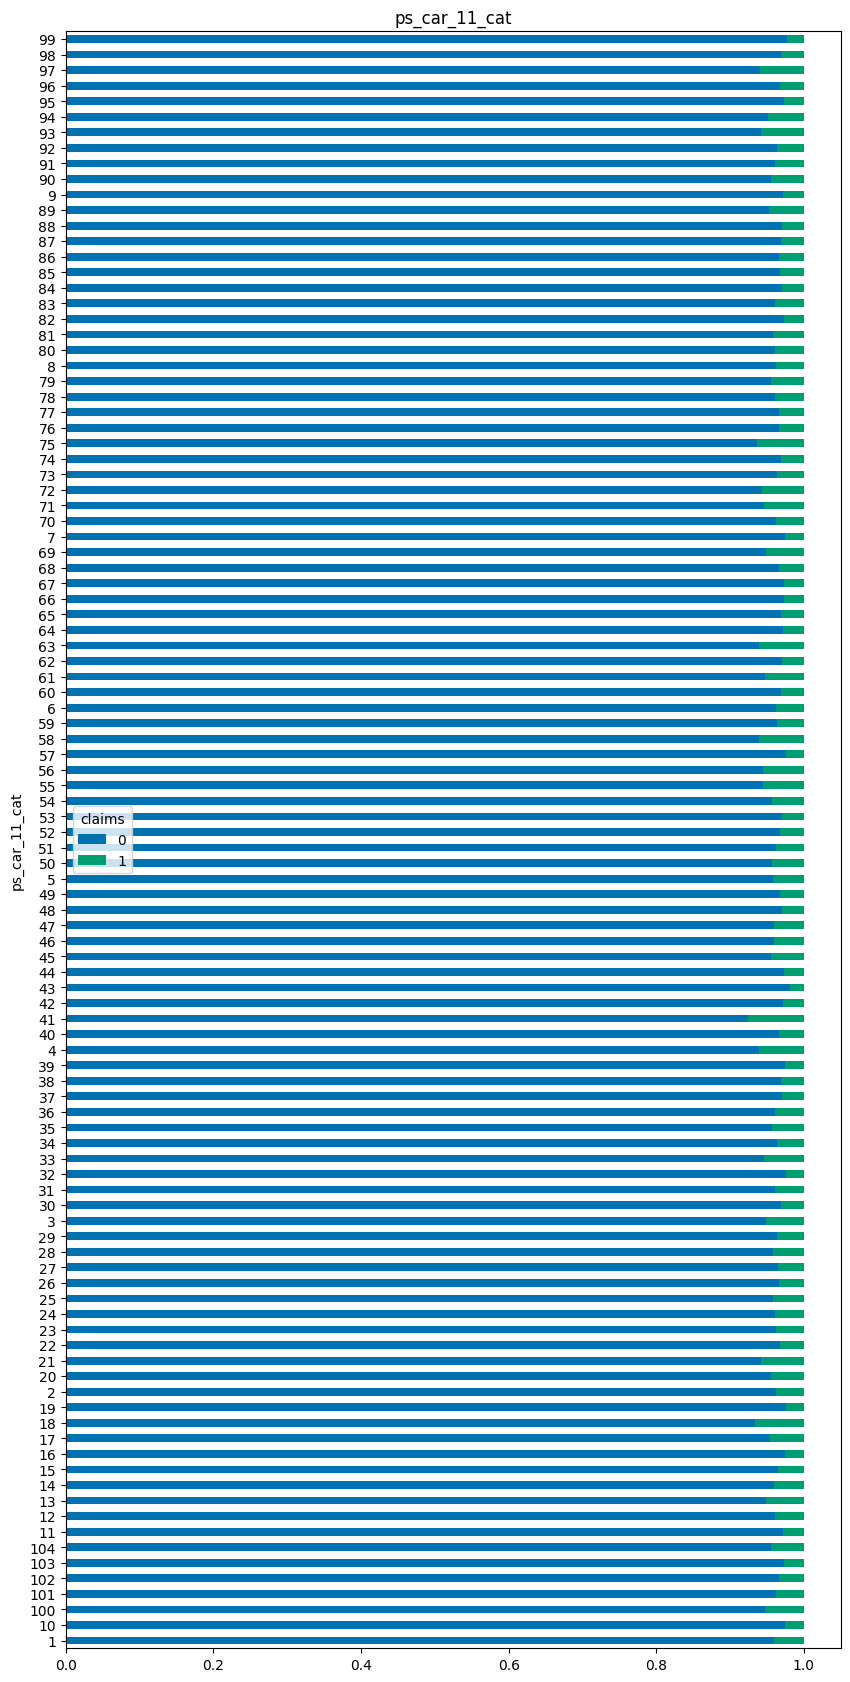

In [ ]:
# extra plot for ps_car_11_cat
(
    pd.crosstab(index = df["ps_car_11_cat"], columns = df["claims"])
    .pipe(lambda df_: df_.div(df_.sum(axis = "columns"), axis = "rows"))
    .plot.barh(stacked=True, title="ps_car_11_cat", figsize=(10, 21))
)



#### observations
no major hints can be observed from this graphs. Although all categories seem to differ a little bit different between the tow categories of the target variable.